# Project 1: EDA with PySpark

* **Your Group Number:** 2
* **Each Team Members Name and Student ID:**     
        LUIS PAZMINO       
        Netid:   lap22002                
        Soft-id: 2873641

By submitting this group work, “I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.”

[source](https://www.rochester.edu/college/honesty/instructors/pledge.html)

# Introduction

The purpose of this project is to help you apply what you learned in the previous lectures to a real-world dataset. At the end of it, you will have a self-contained notebook that you can brag about in job interviews. I've left some code cells and given some info on dataframe shape to help you check your work...

Now let's go tackle the PPP dataset and find some interesting trends using PySpark!

## Download PPP data

You can download the data from here (https://data.sba.gov/dataset/ppp-foia). We will use the first three files.

I have tried copying the link address and pasting it here (so no need to mount your Google Drive) - but the link address changes every few months, so instead we can download locally, drag to Google Drive, and use a shareable link.

For some reason, I had to upgrade gdown to download a massive .csv file from my Google Drive... run this then try to download the files from your Google Drive!

In [1]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [2]:
# download from my google drive 3 files
!gdown 1atHPCDPXCH0kiZUOK7jXHvoH75ZzKZJT
!gdown 1oo9AKLjIhs9r2KMUZLdCXaYa9hm5LVS3
!gdown 1UcWAPWTWAhRd2TWrF9HiZDLqVCV1oX6n

Downloading...
From (original): https://drive.google.com/uc?id=1atHPCDPXCH0kiZUOK7jXHvoH75ZzKZJT
From (redirected): https://drive.google.com/uc?id=1atHPCDPXCH0kiZUOK7jXHvoH75ZzKZJT&confirm=t&uuid=120f7ee0-fd7f-43a8-9d20-48c5c51b5c28
To: /content/public_150k_plus_230930.csv
100% 452M/452M [00:04<00:00, 108MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1oo9AKLjIhs9r2KMUZLdCXaYa9hm5LVS3
From (redirected): https://drive.google.com/uc?id=1oo9AKLjIhs9r2KMUZLdCXaYa9hm5LVS3&confirm=t&uuid=7c551b12-c2e5-4836-86c8-03acabec5e39
To: /content/public_up_to_150k_1_230930.csv
100% 414M/414M [00:04<00:00, 90.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1UcWAPWTWAhRd2TWrF9HiZDLqVCV1oX6n
From (redirected): https://drive.google.com/uc?id=1UcWAPWTWAhRd2TWrF9HiZDLqVCV1oX6n&confirm=t&uuid=9c5039f8-4290-4a10-b5e6-ab64ad8699c8
To: /content/public_up_to_150k_2_230930.csv
100% 412M/412M [00:03<00:00, 116MB/s]


If you look left, you should be able to see the three big .csv files on the lefthand side.

## Download zipcode-level socioeconomic data
It's generally not known what census tract a business resides in, but the zipcode is almost always known.

This repo (https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode) has zipcode-level census attributes. I have downloaded all of the files to our local runtime on the left.

In [3]:
# I downloaded the 5 files to my drive and then I used gdown
!gdown 1WASP5Mc2iQ1lbhduFHOm4lkS3eGx3aTf
!gdown 1A2hkRWVg3nzjyP8HdYGNQsDiNWCZHbX0
!gdown 1wW263wVydkZr6x0ZnLmfIb1vdHdfaYmX
!gdown 1-S-2utInqlc-nyyGasMIWDY-UtBPog4A
!gdown 16g2s2VBQC73254W1CcKCtzj1q0727rUO

Downloading...
From: https://drive.google.com/uc?id=1WASP5Mc2iQ1lbhduFHOm4lkS3eGx3aTf
To: /content/demo.txt
100% 26.7M/26.7M [00:00<00:00, 103MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1A2hkRWVg3nzjyP8HdYGNQsDiNWCZHbX0
To: /content/econ.txt
100% 49.7M/49.7M [00:00<00:00, 79.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wW263wVydkZr6x0ZnLmfIb1vdHdfaYmX
To: /content/housing.txt
100% 49.0M/49.0M [00:00<00:00, 90.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-S-2utInqlc-nyyGasMIWDY-UtBPog4A
To: /content/rural_urban.txt
100% 923k/923k [00:00<00:00, 31.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=16g2s2VBQC73254W1CcKCtzj1q0727rUO
To: /content/social.txt
100% 46.0M/46.0M [00:00<00:00, 82.1MB/s]


# Install Spark

In [4]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# findspark
import findspark
findspark.init()

# Start session

We start the builder pattern `SparkSession.builder` and then chain a configuration parameter that defined the application name.

Providing a useful `appName` helps you identify which programs are running on your Spark cluster.

In [5]:
from pyspark.sql import SparkSession
# for concise script, we import all functions as F
import pyspark.sql.functions as F
from pyspark.sql.functions import col, sum

spark = SparkSession.builder\
        .appName("Project1_EDA_with_PySpark")\
        .getOrCreate()

# 🔴 Organize your folders (5 pts)

## (1) Create a folder on the local runtime called 'census' and copy all of the .txt files over to this folder
Like we did in class!

In [6]:
# get the working directory
%pwd

'/content'

In [7]:
%ls

demo.txt     public_150k_plus_230930.csv     rural_urban.txt  spark-3.0.0-bin-hadoop3.2/
econ.txt     public_up_to_150k_1_230930.csv  sample_data/     spark-3.0.0-bin-hadoop3.2.tgz
housing.txt  public_up_to_150k_2_230930.csv  social.txt


In [8]:
# make a directory called census
import os as os
# Define the directory path
directory = "/content/census"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory 'census' created successfully")
else:
    print("Directory 'census' already exists")

Directory 'census' created successfully


In [9]:
%cd /content/census

/content/census


In [10]:
%pwd

'/content/census'

**I move the files to census folder**

In [11]:
# move all of the files we just downloaded
%mv /content/demo.txt /content/census/
%mv /content/econ.txt /content/census/
%mv /content/housing.txt /content/census/
%mv /content/rural_urban.txt /content/census/
%mv /content/social.txt /content/census/


In [12]:
%ls

demo.txt  econ.txt  housing.txt  rural_urban.txt  social.txt


## (2) Create a folder on the local runtime called 'PPP' and copy all of the .csv files over to this folder
Like we did in class! Use mv and not cp.

In [13]:
%cd /content

/content


In [14]:
%pwd

'/content'

In [15]:
# make a directory called PPP
%mkdir PPP

In [16]:
%cd /content/PPP

/content/PPP


**I mode the files to PPP folder**

In [17]:
# move all of the csv files we just downloaded
%mv /content/public_150k_plus_230930.csv /content/PPP/
%mv /content/public_up_to_150k_1_230930.csv /content/PPP/
%mv /content/public_up_to_150k_2_230930.csv /content/PPP/



In [18]:
%pwd

'/content/PPP'

In [19]:
%ls

public_150k_plus_230930.csv  public_up_to_150k_1_230930.csv  public_up_to_150k_2_230930.csv


In [20]:
%cd

/root


In [21]:
##%rm -r ./###

# 🔴 Clean the PPP data (10 points)

## (1) Append/concatenate all of the PPP csv files together
You should end up with ~2.76M rows and 53 columns if you did it right. You only need one line of code if you use the wildcard. Make sure you print the rows and column count to check your work or points off!

There are zipcode fields for the business and the banks! But be careful, there are null values!

In [22]:
import os as os
directory_path = "/content/PPP/"
# Read all CSV files in the directory and union them into a single DataFrame
PPP1 = spark.read.csv(directory_path, sep=",", header=True, inferSchema=True, timestampFormat="yyyy-MM-dd")

# Show the DataFrame schema and first few rows
PPP1.printSchema()
PPP1.show()

root
 |-- LoanNumber: long (nullable = true)
 |-- DateApproved: string (nullable = true)
 |-- SBAOfficeCode: integer (nullable = true)
 |-- ProcessingMethod: string (nullable = true)
 |-- BorrowerName: string (nullable = true)
 |-- BorrowerAddress: string (nullable = true)
 |-- BorrowerCity: string (nullable = true)
 |-- BorrowerState: string (nullable = true)
 |-- BorrowerZip: string (nullable = true)
 |-- LoanStatusDate: string (nullable = true)
 |-- LoanStatus: string (nullable = true)
 |-- Term: string (nullable = true)
 |-- SBAGuarantyPercentage: string (nullable = true)
 |-- InitialApprovalAmount: double (nullable = true)
 |-- CurrentApprovalAmount: double (nullable = true)
 |-- UndisbursedAmount: double (nullable = true)
 |-- FranchiseName: string (nullable = true)
 |-- ServicingLenderLocationID: integer (nullable = true)
 |-- ServicingLenderName: string (nullable = true)
 |-- ServicingLenderAddress: string (nullable = true)
 |-- ServicingLenderCity: string (nullable = true)
 |-

In [23]:
print((PPP1.count(), len(PPP1.columns)))

(2768525, 53)


## (2) Clean the zipcode column for PPP files
There are some that are missing and there are some that have a long format (12345-6789).

We only want records where the `BorrowerZip`:
*  zip code exists (is non-null)
*  if it does exist, make return only the first 5 digits (https://www.datasciencemadesimple.com/extract-first-n-and-last-n-character-in-pyspark/)

Now answer:
* How many rows did you drop?
* What percentage of the original data was returned? Do you think this is acceptable data quality?

In [24]:
%pwd

'/root'

In [25]:
PPP = PPP1.dropna(subset=['BorrowerZip'])
PPP.show(5)

+----------+------------+-------------+----------------+--------------------+--------------------+----------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+----------------+-----------------+------------+----------+-----+------------+---------+--------------------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerNa

In [26]:
print((PPP.count(), len(PPP.columns)))

(2768363, 53)


In [27]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as pyspark_sum

# Check for null values in the 'BorrowerZip' column and count them
null_count = PPP.where(col('BorrowerZip').isNull()).count()

print("Number of null values in 'BorrowerZip' column:", null_count)


Number of null values in 'BorrowerZip' column: 0


In [28]:
from pyspark.sql.functions import expr

# Extract the first 5 characters and drop the last 4 characters of the 'BorrowerZip' column
PPP = PPP.withColumn("BorrowerZip", expr("substring(BorrowerZip, 1, 5)"))

# Show the updated DataFrame
PPP.show()


+----------+------------+-------------+----------------+--------------------+--------------------+----------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+----------------+-----------------+------------+----------+-----+------------+---------+--------------------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerNa

**Checking the final BorrowerZip column shape**

In [29]:
# Filter rows where 'BorrowerZip' column is lower than 10000
filtered_df1 = PPP.filter(col('BorrowerZip') < 10000)


print((filtered_df1.count(), len(filtered_df1.columns)))

(149201, 53)


In [30]:
# Sort the DataFrame by 'BorrowerZip' column in ascending order, we can see the lowest 0 starting codes zipcodes still have all 5 digits.
sorted_df1 = filtered_df1.orderBy('BorrowerZip')

# Show the sorted DataFrame
sorted_df1.show()

+----------+------------+-------------+----------------+--------------------+--------------------+--------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+--------------+-----------------+------------+----------+----+------------+---------+----------+------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+------------+---------------------------+--------------------+---------------------+----------------------+------------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerName|     BorrowerAddress

In [31]:
#We can see the largest 0 starting zip codes, still have 5 digits.
# Sort the DataFrame by 'BorrowerZip' column in descending order
sorted_df1 = filtered_df1.orderBy(filtered_df1['BorrowerZip'].desc())

# Show the sorted DataFrame
sorted_df1.show()


+----------+------------+-------------+----------------+--------------------+--------------------+-------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+-------------+-----------------+------------+----------+-----+------------+---------+----------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+------------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerName|     Borrow

### **How many rows did I drop?**
**What percentage of the original data was returned? Do you think this is acceptable data quality?**

**The before and after of rows**

In [32]:
# Get the row counts for PPP1 and PPP
rows_PPP1 = PPP1.count()
rows_PPP = PPP.count()

# Calculate the difference in row counts
row_difference = rows_PPP - rows_PPP1

# Calculate the percentage difference
percentage_difference = (row_difference / rows_PPP) * 100

# Print the results
print(rows_PPP1)
print(rows_PPP)
print("Number of rows dropped:", row_difference)
print("Percentage of difference: {:.2f}%".format(percentage_difference))


2768525
2768363
Number of rows dropped: -162
Percentage of difference: -0.01%


**In this case, the difference between PPP1 and PPP is very small, with only 162 rows dropped out of a total of over 2.7 million rows. The percentage of difference is also negligible, at -0.01%.**

**I think it's common to have variations in row counts between different datasets due to data preprocessing steps such as filtering, cleaning, or joining. In this scenario, the small difference indicates that the data quality is generally acceptable. However, it's always a good practice to investigate the reasons for the discrepancy and ensure that the data cleaning process is accurate and not unintentionally removing important information. But since the difference here is minimal, I think it's likely not a cause for concern.**

# 🔴 Clean up ALL census files (10 points)
Try to use as little code as possible. You should end up with exactly 33120 rows and ~900 columns (depending on if you dropped the dirty zip code column.)

## (1) Read the files

In [33]:
# Reading the text files as csv
demo= spark.read.option("header","true").option("sep", "\t").csv("/content/census/demo.txt")
econ= spark.read.option("header","true").option("sep", "\t").csv("/content/census/econ.txt")
housing= spark.read.option("header","true").option("sep", "\t").csv("/content/census/housing.txt")
rural_urban= spark.read.option("header","true").option("sep", "\t").csv("/content/census/rural_urban.txt")
social= spark.read.option("header","true").option("sep", "\t").csv("/content/census/social.txt")

**I need my brain to understand the data is so that I print a schema and show it to have a better understanding.**

In [34]:
demo.printSchema()
demo.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- sex_and_age-population-total_population: string (nullable = true)
 |-- sex_and_age-population-male_total_population: string (nullable = true)
 |-- sex_and_age-percent-male-of-total_population: string (nullable = true)
 |-- sex_and_age-population-female_total_population: string (nullable = true)
 |-- sex_and_age-percent-female-of-total_population: string (nullable = true)
 |-- sex_and_age-population-under_5_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-under_5_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-5_to_9_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-5_to_9_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-10_to_14_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-10_to_14_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-15_to_19_years_total_population: string (

In [35]:
econ.printSchema()
econ.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- employment_status-population-population_16_years_and_over: string (nullable = true)
 |-- employment_status-population-in_labor_force_population_16_years_and_over: string (nullable = true)
 |-- employment_status-percent-in_labor_force-of-population_16_years_and_over: string (nullable = true)
 |-- employment_status-population-in_civilian_labor_force_population_16_years_and_over: string (nullable = true)
 |-- employment_status-percent-in_civilian_labor_force-of-population_16_years_and_over: string (nullable = true)
 |-- employment_status-population-employed_population_16_years_and_over: string (nullable = true)
 |-- employment_status-percent-employed-of-population_16_years_and_over: string (nullable = true)
 |-- employment_status-population-unemployed_population_16_years_and_over: string (nullable = true)
 |-- employment_status-percent-unemployed-of-population_16_years_and_over: string (nullable = true)
 |-- employment_status-population-armed

In [36]:
housing.printSchema()
housing.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- housing_occupancy-housing_units-total_housing_units: string (nullable = true)
 |-- housing_occupancy-housing_units-occupied_housing_units_total_housing_units: string (nullable = true)
 |-- housing_occupancy-percent-occupied_housing_units-of-total_housing_units: string (nullable = true)
 |-- housing_occupancy-housing_units-vacant_housing_units_total_housing_units: string (nullable = true)
 |-- housing_occupancy-percent-vacant_housing_units-of-total_housing_units: string (nullable = true)
 |-- housing_occupancy-percent-homeowner_vacancy_rate-of-total_housing_units_for_sale: string (nullable = true)
 |-- housing_occupancy-percent-rental_vacancy_rate-of-total_housing_units_for_sale: string (nullable = true)
 |-- units_in_structure-housing_units-total_housing_units: string (nullable = true)
 |-- units_in_structure-housing_units-1_unit_detached_total_housing_units: string (nullable = true)
 |-- units_in_structure-percent-1_unit_detached-of-total

In [37]:
rural_urban.printSchema()
rural_urban.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- urban_rural-population-total_population: string (nullable = true)
 |-- urban_rural-population-urban_total_population: string (nullable = true)
 |-- urban_rural-population-rural_total_population: string (nullable = true)
 |-- urban_rural-percent-urban_population-of-total_population: string (nullable = true)
 |-- urban_rural-percent-rural_population-of-total_population: string (nullable = true)

+-----+---------------------------------------+---------------------------------------------+---------------------------------------------+--------------------------------------------------------+--------------------------------------------------------+
|ZCTA5|urban_rural-population-total_population|urban_rural-population-urban_total_population|urban_rural-population-rural_total_population|urban_rural-percent-urban_population-of-total_population|urban_rural-percent-rural_population-of-total_population|
+-----+---------------------------------------+-

In [38]:
social.printSchema()
social.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- households_by_type-total_households: string (nullable = true)
 |-- households_by_type-households-family_households: string (nullable = true)
 |-- households_by_type-percent-family_households-of-total_households: string (nullable = true)
 |-- households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years: string (nullable = true)
 |-- households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households: string (nullable = true)
 |-- households_by_type-households-married_couple_family_households: string (nullable = true)
 |-- households_by_type-percent-married_couple_familiy_households-of-total_households: string (nullable = true)
 |-- households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years: string (nullable = true)
 |-- households_by_type-percent-married_couple_family_households_with_own_children_of

In [39]:
print((demo.count(), len(demo.columns)))
print((econ.count(), len(econ.columns)))
print((housing.count(), len(housing.columns)))
print((rural_urban.count(), len(rural_urban.columns)))
print((social.count(), len(social.columns)))

(33120, 153)
(33120, 225)
(33120, 255)
(33120, 6)
(33120, 252)


## (2) Join files together

Hint: everything except the zipcode column should be converted to float... check the schema to be sure...
* https://sparkbyexamples.com/pyspark/pyspark-join-two-or-multiple-dataframes/

**I convert all the columns to numbers except ZCTA5**

In [40]:
# Get all columns except 'ZCTA5'
columns_to_convert = [col_name for col_name in demo.columns if col_name != 'ZCTA5']

# Convert selected columns to float
for column_name in columns_to_convert:
    demo = demo.withColumn(column_name, col(column_name).cast("float"))

# Print the schema to verify the changes
demo.printSchema()

# Show the first 5 rows to verify the changes
demo.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- sex_and_age-population-total_population: float (nullable = true)
 |-- sex_and_age-population-male_total_population: float (nullable = true)
 |-- sex_and_age-percent-male-of-total_population: float (nullable = true)
 |-- sex_and_age-population-female_total_population: float (nullable = true)
 |-- sex_and_age-percent-female-of-total_population: float (nullable = true)
 |-- sex_and_age-population-under_5_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-under_5_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-5_to_9_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-5_to_9_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-10_to_14_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-10_to_14_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-15_to_19_years_total_population: float (nullable = t

In [41]:
# Get all columns except 'ZCTA5'
columns_to_convert = [col_name for col_name in econ.columns if col_name != 'ZCTA5']

# Convert selected columns to float
for column_name in columns_to_convert:
    econ = econ.withColumn(column_name, col(column_name).cast("float"))

# Print the schema to verify the changes
econ.printSchema()

# Show the first 5 rows to verify the changes
econ.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- employment_status-population-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-in_labor_force_population_16_years_and_over: float (nullable = true)
 |-- employment_status-percent-in_labor_force-of-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-in_civilian_labor_force_population_16_years_and_over: float (nullable = true)
 |-- employment_status-percent-in_civilian_labor_force-of-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-employed_population_16_years_and_over: float (nullable = true)
 |-- employment_status-percent-employed-of-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-unemployed_population_16_years_and_over: float (nullable = true)
 |-- employment_status-percent-unemployed-of-population_16_years_and_over: float (nullable = true)
 |-- employment_status-population-armed_forces_p

**I rename the column without as single . in the house_heating_fuel-housing_units-fuel_oil_kerosene_etc._occupied_housing_units column and house_heating_fuel-percent-fuel_oil_kerosene_etc.-of-occupied_housing_units column in housing data frame, to avoid reading problems**

In [42]:
# Rename the column
housing = housing.withColumnRenamed("house_heating_fuel-housing_units-fuel_oil_kerosene_etc._occupied_housing_units", "house_heating_fuel_housing_units_kerosene")
housing = housing.withColumnRenamed("house_heating_fuel-percent-fuel_oil_kerosene_etc.-of-occupied_housing_units", "house_heating_fuel-percent-fuel_oil_kerosene")


In [43]:
# Get all columns except 'ZCTA5'
columns_to_convert = [col_name for col_name in housing.columns if col_name != 'ZCTA5']

# Convert selected columns to float
for column_name in columns_to_convert:
    housing = housing.withColumn(column_name, col(column_name).cast("float"))

# Print the schema to verify the changes
housing.printSchema()

# Show the first 5 rows to verify the changes
housing.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- housing_occupancy-housing_units-total_housing_units: float (nullable = true)
 |-- housing_occupancy-housing_units-occupied_housing_units_total_housing_units: float (nullable = true)
 |-- housing_occupancy-percent-occupied_housing_units-of-total_housing_units: float (nullable = true)
 |-- housing_occupancy-housing_units-vacant_housing_units_total_housing_units: float (nullable = true)
 |-- housing_occupancy-percent-vacant_housing_units-of-total_housing_units: float (nullable = true)
 |-- housing_occupancy-percent-homeowner_vacancy_rate-of-total_housing_units_for_sale: float (nullable = true)
 |-- housing_occupancy-percent-rental_vacancy_rate-of-total_housing_units_for_sale: float (nullable = true)
 |-- units_in_structure-housing_units-total_housing_units: float (nullable = true)
 |-- units_in_structure-housing_units-1_unit_detached_total_housing_units: float (nullable = true)
 |-- units_in_structure-percent-1_unit_detached-of-total_housing_

In [44]:
# Get all columns except 'ZCTA5'
columns_to_convert = [col_name for col_name in rural_urban.columns if col_name != 'ZCTA5']

# Convert selected columns to float
for column_name in columns_to_convert:
    rural_urban = rural_urban.withColumn(column_name, col(column_name).cast("float"))

# Print the schema to verify the changes
rural_urban.printSchema()

# Show the first 5 rows to verify the changes
rural_urban.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- urban_rural-population-total_population: float (nullable = true)
 |-- urban_rural-population-urban_total_population: float (nullable = true)
 |-- urban_rural-population-rural_total_population: float (nullable = true)
 |-- urban_rural-percent-urban_population-of-total_population: float (nullable = true)
 |-- urban_rural-percent-rural_population-of-total_population: float (nullable = true)

+-----+---------------------------------------+---------------------------------------------+---------------------------------------------+--------------------------------------------------------+--------------------------------------------------------+
|ZCTA5|urban_rural-population-total_population|urban_rural-population-urban_total_population|urban_rural-population-rural_total_population|urban_rural-percent-urban_population-of-total_population|urban_rural-percent-rural_population-of-total_population|
+-----+---------------------------------------+------

In [45]:
# Get all columns except 'ZCTA5'
columns_to_convert = [col_name for col_name in social.columns if col_name != 'ZCTA5']

# Convert selected columns to float
for column_name in columns_to_convert:
    social = social.withColumn(column_name, col(column_name).cast("float"))

# Print the schema to verify the changes
social.printSchema()

# Show the first 5 rows to verify the changes
social.show(5)

root
 |-- ZCTA5: string (nullable = true)
 |-- households_by_type-total_households: float (nullable = true)
 |-- households_by_type-households-family_households: float (nullable = true)
 |-- households_by_type-percent-family_households-of-total_households: float (nullable = true)
 |-- households_by_type-households-family_households_with_own_children_of_the_householder_under_18_years: float (nullable = true)
 |-- households_by_type-percent-family_households_with_own_children_of_the_householder_under_18_years-of-total_households: float (nullable = true)
 |-- households_by_type-households-married_couple_family_households: float (nullable = true)
 |-- households_by_type-percent-married_couple_familiy_households-of-total_households: float (nullable = true)
 |-- households_by_type-households-married_couple_family_households_with_own_children_of_the_householder_under_18_years: float (nullable = true)
 |-- households_by_type-percent-married_couple_family_households_with_own_children_of_the_hou

In [46]:
# Joining data frames based on the "ZCTA5" column
census = demo.join(econ, "ZCTA5", "left") \
                .join(housing, "ZCTA5", "left") \
                .join(rural_urban, "ZCTA5", "left") \
                .join(social, "ZCTA5", "left")


# Show the first few rows of the merged data frame
census.show(5)


+-----+---------------------------------------+--------------------------------------------+--------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+-----

In [47]:
census.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- sex_and_age-population-total_population: float (nullable = true)
 |-- sex_and_age-population-male_total_population: float (nullable = true)
 |-- sex_and_age-percent-male-of-total_population: float (nullable = true)
 |-- sex_and_age-population-female_total_population: float (nullable = true)
 |-- sex_and_age-percent-female-of-total_population: float (nullable = true)
 |-- sex_and_age-population-under_5_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-under_5_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-5_to_9_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-5_to_9_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-10_to_14_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-10_to_14_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-15_to_19_years_total_population: float (nullable = t

## (3) Check your work

In [48]:
print((census.count(), len(census.columns)))

(33120, 887)


To get full credit, you should have:
* (33120, ~900)
* All numeric columns (except for the clean zipcode column which should be a string - state why this column must be a string!)

# 🔴 Analysis Questions (70 points)

10 pts each.

## (1) Join the combined census data to the PPP data based on the zipcode

Let's call this new file `df`. Use `df` for all future analysis questions.

In [49]:
# Joining the PPP and census data frames using BorrowerZip and ZCTA5 columns
df = PPP.join(census, PPP.BorrowerZip == census.ZCTA5, "inner")
# Show df
df.show()
# df size
print((df.count(), len(df.columns)))

+----------+------------+-------------+----------------+--------------------+--------------------+------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+-----------+-----------------+------------+----------+-----+------------+---------+----------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+------------+-----------+---------+-----------------+---------------+-----+---------------------------------------+--------------------------------------------+-

In [50]:
df.printSchema()

root
 |-- LoanNumber: long (nullable = true)
 |-- DateApproved: string (nullable = true)
 |-- SBAOfficeCode: integer (nullable = true)
 |-- ProcessingMethod: string (nullable = true)
 |-- BorrowerName: string (nullable = true)
 |-- BorrowerAddress: string (nullable = true)
 |-- BorrowerCity: string (nullable = true)
 |-- BorrowerState: string (nullable = true)
 |-- BorrowerZip: string (nullable = true)
 |-- LoanStatusDate: string (nullable = true)
 |-- LoanStatus: string (nullable = true)
 |-- Term: string (nullable = true)
 |-- SBAGuarantyPercentage: string (nullable = true)
 |-- InitialApprovalAmount: double (nullable = true)
 |-- CurrentApprovalAmount: double (nullable = true)
 |-- UndisbursedAmount: double (nullable = true)
 |-- FranchiseName: string (nullable = true)
 |-- ServicingLenderLocationID: integer (nullable = true)
 |-- ServicingLenderName: string (nullable = true)
 |-- ServicingLenderAddress: string (nullable = true)
 |-- ServicingLenderCity: string (nullable = true)
 |-

**I dont want two zip code columns, so I drop ZCTA5 column**

In [51]:
# Drop the 'ZCTA5' column
df = df.drop("ZCTA5")

# Print the schema to verify the changes
df.printSchema()

root
 |-- LoanNumber: long (nullable = true)
 |-- DateApproved: string (nullable = true)
 |-- SBAOfficeCode: integer (nullable = true)
 |-- ProcessingMethod: string (nullable = true)
 |-- BorrowerName: string (nullable = true)
 |-- BorrowerAddress: string (nullable = true)
 |-- BorrowerCity: string (nullable = true)
 |-- BorrowerState: string (nullable = true)
 |-- BorrowerZip: string (nullable = true)
 |-- LoanStatusDate: string (nullable = true)
 |-- LoanStatus: string (nullable = true)
 |-- Term: string (nullable = true)
 |-- SBAGuarantyPercentage: string (nullable = true)
 |-- InitialApprovalAmount: double (nullable = true)
 |-- CurrentApprovalAmount: double (nullable = true)
 |-- UndisbursedAmount: double (nullable = true)
 |-- FranchiseName: string (nullable = true)
 |-- ServicingLenderLocationID: integer (nullable = true)
 |-- ServicingLenderName: string (nullable = true)
 |-- ServicingLenderAddress: string (nullable = true)
 |-- ServicingLenderCity: string (nullable = true)
 |-

In [52]:
print((df.count(), len(df.columns)))

(2751431, 939)


## (2) Identify the Top 10 states that received loans

Defined as the sum of funds per State across all records. You will need to recode this column because it is categorical data. Use the upper limit of each range and make sure it is NUMERIC data.

In [53]:
# Convert 'CurrentApprovalAmount' column to numeric data type
df1 = df.withColumn("CurrentApprovalAmount", df["CurrentApprovalAmount"].cast("double"))

# Group by 'BorrowerState' and aggregate the sum of 'CurrentApprovalAmount'
state_loan_amounts = df1.groupBy("BorrowerState") \
                        .agg({"CurrentApprovalAmount": "sum"}) \
                        .withColumnRenamed("sum(CurrentApprovalAmount)", "TotalApprovalAmount")

# Sort by the sum of funds in descending order
sorted_states = state_loan_amounts.sort(col("TotalApprovalAmount").desc())

# Take the top 10 states
top_10_states = sorted_states.limit(10)

# Show the top 10 states
top_10_states.show(truncate=False)

+-------------+---------------------+
|BorrowerState|TotalApprovalAmount  |
+-------------+---------------------+
|CA           |1.0261504007051006E11|
|NY           |4.145319651625998E10 |
|TX           |3.975551001231E10    |
|FL           |2.8060162746689983E10|
|IL           |2.3113357370220013E10|
|PA           |2.112121970708998E10 |
|OH           |1.850262399355E10    |
|NJ           |1.7333010913989998E10|
|MI           |1.6274977148559994E10|
|CO           |1.4962486547529995E10|
+-------------+---------------------+



## (3) Identify the Top 10 banks that loaned money
Defined as the sum of loaned funds per State across all records. Are many of the banks who loaned the most money in the same State?

Again, make sure you are using the numeric version of this categorical column!

In [54]:
# Convert 'CurrentApprovalAmount' column to numeric data type
df2 = df.withColumn("CurrentApprovalAmount", df["CurrentApprovalAmount"].cast("double"))

# Group by 'ServicingLenderName' and 'ServicingLenderState', and aggregate the sum of 'CurrentApprovalAmount'
bank_loan_amounts = df2.groupBy("ServicingLenderName", "ServicingLenderState") \
                      .agg(F.sum("CurrentApprovalAmount").alias("TotalApprovalAmount"))

# Sort by the sum of funds in descending order
sorted_banks = bank_loan_amounts.sort(F.col("TotalApprovalAmount").desc())

# Take the top 10 banks
top_10_banks = sorted_banks.limit(10)

# Show the top 10 banks
top_10_banks.show(truncate=False)

+-----------------------------------------+--------------------+---------------------+
|ServicingLenderName                      |ServicingLenderState|TotalApprovalAmount  |
+-----------------------------------------+--------------------+---------------------+
|JPMorgan Chase Bank, National Association|OH                  |3.3665630861499992E10|
|Bank of America, National Association    |NC                  |2.509482059776001E10 |
|PNC Bank, National Association           |DE                  |1.6792757821969994E10|
|Truist Bank                              |NC                  |1.2315433935840006E10|
|Manufacturers and Traders Trust Company  |NY                  |1.085902954319E10    |
|U.S. Bank, National Association          |OH                  |1.0804460337280008E10|
|Wells Fargo Bank, National Association   |SD                  |9.609684992119999E9  |
|BMO Bank National Association            |IL                  |9.116261549170004E9  |
|KeyBank National Association             |

## (4) Which banks loaned the most money to businesses that were in the same State?
You will need to do a logical statement here! For example, given that a bank is headquarted in CT, how much money was loaned to CT businesses by this bank?

Generalize to all banks and businesses where this is true, then sort from high to low (return the top 10.)

In [55]:
# Filter the DataFrame
df3 = df.filter(df["ServicingLenderState"] == df["BorrowerState"])

# Group by 'ServicingLenderName' and aggregate the sum of 'CurrentApprovalAmount'
bank_loan_amounts = df3.groupBy("ServicingLenderName",'ServicingLenderState','BorrowerState') \
                               .agg(F.sum("CurrentApprovalAmount").alias("TotalApprovalAmount"))

# Sort by the sum of funds in descending order
sorted_banks = bank_loan_amounts.sort(F.col("TotalApprovalAmount").desc())

top_10_sorted_banks = sorted_banks.limit(10)

# Show the top 10 banks
top_10_sorted_banks.show(truncate=False)


+---------------------------------------+--------------------+-------------+--------------------+
|ServicingLenderName                    |ServicingLenderState|BorrowerState|TotalApprovalAmount |
+---------------------------------------+--------------------+-------------+--------------------+
|City National Bank                     |CA                  |CA           |4.556732564710001E9 |
|Manufacturers and Traders Trust Company|NY                  |NY           |3.98461135943E9     |
|Frost Bank                             |TX                  |TX           |3.57547553442E9     |
|The Huntington National Bank           |OH                  |OH           |3.26133623363E9     |
|Harvest Small Business Finance, LLC    |CA                  |CA           |2.376644744449999E9 |
|Signature Bank                         |NY                  |NY           |2.2070277965600004E9|
|Truist Bank                            |NC                  |NC           |2.0898347703400002E9|
|East West Bank     

## (5) Which zipcodes received the most funding per capita?
This requires you to calculate the sum of funds per zipcode and then divide by the population per zipcode, then sort from high to low.

Make sure you use the clean 5 digit zip code!

In [56]:
df4=df.groupby('BorrowerZip')\
  .agg((F.sum("CurrentApprovalAmount")/F.first("sex_and_age-population-total_population")).alias('funding_per_capita'))\
  .orderBy('funding_per_capita',ascending=False)
df4.withColumn('funding_per_capita', F.round('funding_per_capita',2)).show()

+-----------+------------------+
|BorrowerZip|funding_per_capita|
+-----------+------------------+
|      11556|        3426626.58|
|      32830|        2587260.52|
|      55111|        1202298.25|
|      20118|          998953.0|
|      33122|          949615.0|
|      55402|         867282.22|
|      94104|         744072.42|
|      70801|         710469.28|
|      00951|         628462.38|
|      99706|         586811.63|
|      06856|         543475.67|
|      07608|         495488.64|
|      75247|         406327.74|
|      18454|         339499.88|
|      13441|         292195.01|
|      32461|         285740.31|
|      98134|         255888.08|
|      60604|         246918.68|
|      60603|         230026.13|
|      60606|         217302.65|
+-----------+------------------+
only showing top 20 rows



**a double check just with 60603 zip code to confirm the calculations.**

In [57]:
# Filter the DataFrame for zip code '60603' and aggregate the sum of 'CurrentApprovalAmount'
total_amount_60603 = df.filter(df["BorrowerZip"] == "60603") \
                       .agg(F.sum("CurrentApprovalAmount").alias("TotalAmount60603"))

                       # Filter the DataFrame for zip code '60603' and aggregate the sum of 'sex_and_age-population-total_population'
population_60603 = df.filter(df["BorrowerZip"] == "60603") \
                     .agg(F.first("sex_and_age-population-total_population").alias("Population_60603"))


# Divide the total amount borrowed by the population of zip code '60603'
borrowing_per_capita_60603 = total_amount_60603.crossJoin(population_60603) \
                                               .withColumn("BorrowingPerCapita60603", F.col("TotalAmount60603") / F.col("Population_60603"))

# Show the borrowing per capita for zip code '60603'
borrowing_per_capita_60603.show()


+----------------+----------------+-----------------------+
|TotalAmount60603|Population_60603|BorrowingPerCapita60603|
+----------------+----------------+-----------------------+
|  2.3669688414E8|          1029.0|      230026.1264723032|
+----------------+----------------+-----------------------+



**I got the same value**

## (6) What is the top industry (NAICS codes) in the top 100 zip codes that received money?
Top 100 zip codes meaning the zip codes that borrowed the most money. I want the most common NAICS code per zip code. Show all 100 rows then sum per NAICS to describe overall trends.

This one is tricky!

In [58]:
from pyspark.sql.window import Window

# Step 1: Group by 'BorrowerZip' and aggregate the sum of 'CurrentApprovalAmount' to find total amount borrowed per zip code
zip_code_amount = df.groupBy("BorrowerZip") \
                    .agg(F.sum("CurrentApprovalAmount").alias("TotalAmountBorrowed"))

# Step 2: Sort by the sum of 'CurrentApprovalAmount' in descending order to identify the top 100 zip codes
top_100_zip_codes = zip_code_amount.orderBy(F.desc("TotalAmountBorrowed")).limit(100)

# Step 3: Join with the original DataFrame to filter for the top 100 zip codes
df_top_100 = df.join(top_100_zip_codes, "BorrowerZip", "inner")

# Step 4: Group by 'BorrowerZip' and 'NAICSCode', and count the occurrences of each NAICS code within each zip code
naics_counts_per_zip = df_top_100.groupBy("BorrowerZip", "NAICSCode") \
                                  .agg(F.count("*").alias("NAICSCount"))

# Step 5: Use window function to find the most common NAICS code per zip code
window_spec = Window.partitionBy("BorrowerZip").orderBy(F.desc("NAICSCount"))
top_naics_per_zip = naics_counts_per_zip.withColumn("rank", F.row_number().over(window_spec)) \
                                        .filter(F.col("rank") == 1)

# Step 6: Sum the counts of NAICS codes to describe overall trends
overall_naics_trends = top_naics_per_zip.groupBy("NAICSCode").agg(F.sum("NAICSCount").alias("TotalCount")) \
                                         .orderBy(F.desc("TotalCount"))

# Show top NAICS code per zip code and overall trends
top_naics_per_zip.show(100, truncate=False)
overall_naics_trends.show(truncate=False)


+-----------+---------+----------+----+
|BorrowerZip|NAICSCode|NAICSCount|rank|
+-----------+---------+----------+----+
|22314      |722511   |68        |1   |
|80301      |722511   |89        |1   |
|85251      |812112   |197       |1   |
|94107      |485310   |136       |1   |
|60611      |722511   |91        |1   |
|10012      |722511   |181       |1   |
|94104      |541110   |280       |1   |
|48083      |541511   |21        |1   |
|10010      |722511   |68        |1   |
|60654      |722511   |112       |1   |
|91311      |713940   |90        |1   |
|75024      |722511   |48        |1   |
|91761      |484110   |65        |1   |
|96819      |238220   |26        |1   |
|94612      |541110   |236       |1   |
|92612      |541110   |185       |1   |
|90058      |424330   |207       |1   |
|94520      |722511   |100       |1   |
|33309      |541110   |19        |1   |
|60606      |541110   |164       |1   |
|22102      |541512   |35        |1   |
|10011      |722511   |142       |1   |


## (7) What are the socioeconomic characteristics of the top 100 zip codes? How do they relate to loan amounts?

Select two census variables that look interesting to you.

Create histograms or scatterplots of those interesting socioeconomic variables with data from the PPP. Make them beautiful and describe what you see.

Don't just pick random variables - try to find an interesting story to tell with data and motivate WHY you picked this column!

**First I create a data frame with "CurrentApprovalAmount" and "BorrowerZip" columns from PPP data frame and the whole census data frame without "ZCTA5" column**

In [59]:
# Join the "PPP" DataFrame with the "census" DataFrame on 'BorrowerZip' and 'ZCTA5'
joined_df1 = census.join(PPP, census["ZCTA5"] == PPP["BorrowerZip"], "inner")

# Select the 'CurrentApprovalAmount' column from the PPP DataFrame and all columns from the census DataFrame
selected_df1 = joined_df1.select(PPP["CurrentApprovalAmount"], PPP["BorrowerZip"], census["*"])

# Drop the 'ZCTA5' column
selected_df1 = selected_df1.drop('ZCTA5')

**Now I filter the top 100 zip codes**

In [60]:
# Step 1: Group by 'BorrowerZip' and aggregate the sum of 'CurrentApprovalAmount' to find total amount borrowed per zip code
zip_code_amount = selected_df1.groupBy("BorrowerZip") \
                    .agg(F.sum("CurrentApprovalAmount").alias("TotalAmountBorrowed"))

# Step 2: Sort by the sum of 'CurrentApprovalAmount' in descending order to identify the top 100 zip codes
top_100_zip_codes = zip_code_amount.orderBy(F.desc("TotalAmountBorrowed")).limit(100)

top_100_zip_codes.show(100)

+-----------+--------------------+
|BorrowerZip| TotalAmountBorrowed|
+-----------+--------------------+
|      10018|1.4907437298799999E9|
|      10001|     1.34205863402E9|
|      10017| 8.208705855400004E8|
|      10022| 8.187770473499999E8|
|      10016| 7.695536991600003E8|
|      92618| 7.549871385400014E8|
|      10036| 6.997589153399997E8|
|      60606| 6.542982654800004E8|
|      10019| 6.217627513199998E8|
|      11101| 6.145571476600003E8|
|      80202| 5.929072439400009E8|
|      92121| 5.823999828000001E8|
|      92101|      5.7897732278E8|
|      10013| 5.648295197200001E8|
|      94103| 5.558311942600011E8|
|      94538|      5.5518511237E8|
|      80112| 5.536116169800011E8|
|      92660| 5.331150363399989E8|
|      10010|      5.2867227489E8|
|      92626| 5.255276741399996E8|
|      92614| 5.025476759499999E8|
|      10003|4.8747493070000005E8|
|      94111|4.6965309159999985E8|
|      85260| 4.673246412299996E8|
|      10004|      4.6728184571E8|
|      90025|4.55135

**I add the socioeconomic characteristics from census again**

In [61]:
# Step 3: Join with the original DataFrame to filter for the top 100 zip codes and add the socioeconomic characteristics from census
df_top_100 = selected_df1.join(top_100_zip_codes, "BorrowerZip", "inner")

df_top_100.show(20)

+-----------+---------------------+---------------------------------------+--------------------------------------------+--------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+--------------------------------

In [62]:
df_top_100.printSchema()

root
 |-- BorrowerZip: string (nullable = true)
 |-- CurrentApprovalAmount: double (nullable = true)
 |-- sex_and_age-population-total_population: float (nullable = true)
 |-- sex_and_age-population-male_total_population: float (nullable = true)
 |-- sex_and_age-percent-male-of-total_population: float (nullable = true)
 |-- sex_and_age-population-female_total_population: float (nullable = true)
 |-- sex_and_age-percent-female-of-total_population: float (nullable = true)
 |-- sex_and_age-population-under_5_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-under_5_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-5_to_9_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-5_to_9_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-10_to_14_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-10_to_14_years-of-total_population: float (nullable = true)
 |-- sex_and_age-popu

Axes(0.125,0.11;0.775x0.77)


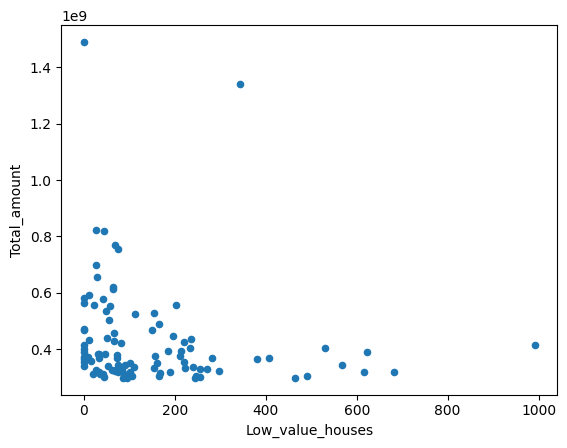

In [63]:
# groupingby zipcodes to check aggregate with CurrentApprovalAmount and Low_value_houses
df100A=df_top_100.groupby('BorrowerZip')\
  .agg(F.sum("CurrentApprovalAmount").alias('Total_amount'),F.avg('value-housing_units-less_than_50000_owner_occupied_units').alias('Low_value_houses'))\
  .sort(F.col("Total_amount").desc()).limit(100).toPandas()
print(df100A.plot.scatter(x='Low_value_houses',y='Total_amount'))

Axes(0.125,0.11;0.775x0.77)


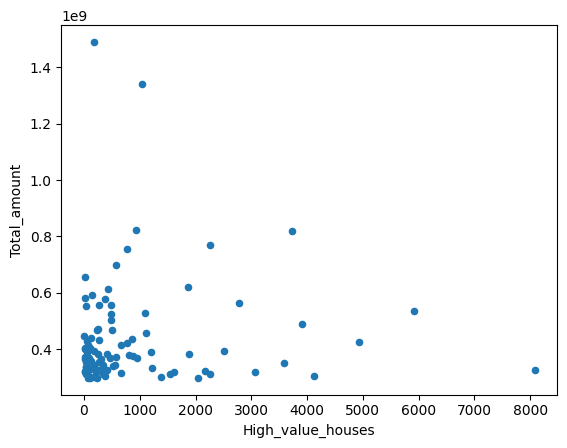

In [64]:
# groupingby zipcodes to check aggregate with CurrentApprovalAmount and High_value_houses
df100B=df_top_100.groupby('BorrowerZip')\
  .agg(F.sum("CurrentApprovalAmount").alias('Total_amount'),F.avg('value-housing_units-1000000_or_more_owner_occupied_units').alias('High_value_houses'))\
  .sort(F.col("Total_amount").desc()).limit(100).toPandas()
print(df100B.plot.scatter(x='High_value_houses',y='Total_amount'))

Axes(0.125,0.11;0.775x0.77)


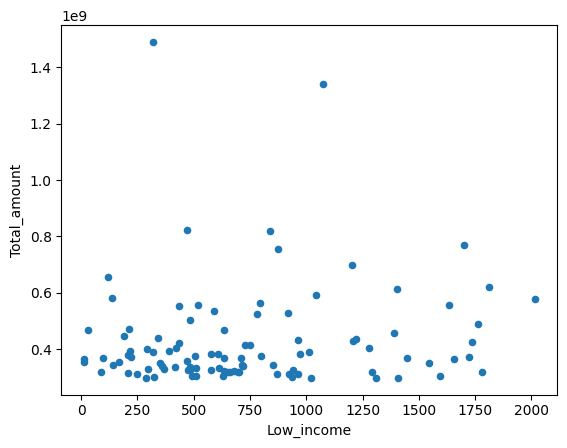

In [65]:
# groupingby zipcodes to check aggregate with CurrentApprovalAmount and Low_income borrowers
df100C=df_top_100.groupby('BorrowerZip')\
  .agg(F.sum("CurrentApprovalAmount").alias('Total_amount'),F.avg('income_and_benefits_in_2016_inflation_adjusted_dollars-households-less_than_10000_total_households').alias('Low_income'))\
  .sort(F.col("Total_amount").desc()).limit(100).toPandas()
print(df100C.plot.scatter(x='Low_income',y='Total_amount'))

Axes(0.125,0.11;0.775x0.77)


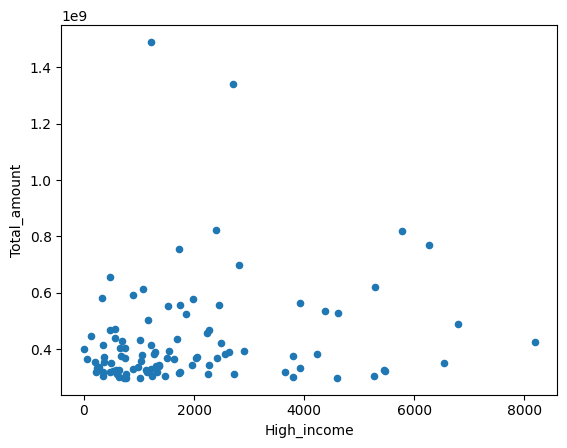

In [66]:
# groupingby zipcodes to check aggregate with CurrentApprovalAmount and High_income borrowers
df100D=df_top_100.groupby('BorrowerZip')\
  .agg(F.sum("CurrentApprovalAmount").alias('Total_amount'),F.avg('income_and_benefits_in_2016_inflation_adjusted_dollars-households-200000_or_more_total_households').alias('High_income'))\
  .sort(F.col("Total_amount").desc()).limit(100).toPandas()
print(df100D.plot.scatter(x='High_income',y='Total_amount'))

In [67]:
#Correlation metric
corr_Low_value_houses = df100A['Low_value_houses'].corr(df100A['Total_amount'])
print("Correlation between 'Low_value_houses' and 'Total_amount':", corr_Low_value_houses)

#Correlation metric
corr_High_value_houses = df100B['High_value_houses'].corr(df100B['Total_amount'])
print("Correlation between 'High_value_houses' and 'Total_amount':", corr_High_value_houses)

#Correlation metric
corr_Low_income = df100C['Low_income'].corr(df100C['Total_amount'])
print("Correlation between 'Low_income' and 'Total_amount':", corr_Low_income)

#Correlation metric
corr_High_income = df100D['High_income'].corr(df100D['Total_amount'])

print("Correlation between 'High_income' and 'Total_amount':", corr_High_income)

Correlation between 'Low_value_houses' and 'Total_amount': -0.14917403290135137
Correlation between 'High_value_houses' and 'Total_amount': 0.05900839704638139
Correlation between 'Low_income' and 'Total_amount': 0.1067300262177059
Correlation between 'High_income' and 'Total_amount': 0.16095170008635873


In [68]:
import pandas as pd

# Calculate correlations
correlations = {
    'Low_value_houses': df100A['Low_value_houses'].corr(df100A['Total_amount']),
    'High_value_houses': df100B['High_value_houses'].corr(df100B['Total_amount']),
    'Low_income': df100C['Low_income'].corr(df100C['Total_amount']),
    'High_income': df100D['High_income'].corr(df100D['Total_amount'])
}

# Convert dictionary to DataFrame
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Metric', 'Correlation'])

print(correlation_df)


              Metric  Correlation
0   Low_value_houses    -0.149174
1  High_value_houses     0.059008
2         Low_income     0.106730
3        High_income     0.160952


Based on the correlation coefficients:

1. **Low Value Houses**: There is a negative correlation of approximately -0.149 between the number of low-value houses and the amount of credit approved to businesses. This suggests that areas with a higher concentration of low-value houses tend to have lower amounts of credit approved to businesses.

2. **High Value Houses**: The correlation coefficient of approximately 0.059 indicates a weak positive correlation between the number of high-value houses and the amount of credit approved to businesses. This suggests that areas with more high-value houses may have slightly higher amounts of credit approved to businesses, but the correlation is not very strong.

3. **Low Income**: There is a positive correlation of about 0.107 between the proportion of low-income households and the amount of credit approved to businesses. This suggests that areas with a higher percentage of low-income households may also have higher amounts of credit approved to businesses.

4. **High Income**: The highest correlation coefficient of approximately 0.161 is observed between the proportion of high-income households and the amount of credit approved to businesses. This indicates a moderate positive correlation, suggesting that areas with more high-income households tend to have higher amounts of credit approved to businesses.

Overall, these correlations provide insights into the relationship between demographic metrics (such as housing values and income levels) and the amount of credit approved to businesses. However, it's important to remember that correlation does not imply causation, and further analysis would be needed to determine any causal relationships.

## (8) Optional extra credit for +10 points. What are the Top 10 zipcodes that had the highest per capita amount of loans going to Women-Owned businesses?

This column is called `Gender` in the `PPP` data.

* What State are these zipcodes in?
* Comment on if they have anything in common?

In [69]:
# Filter the DataFrame for rows where the 'Gender' column is equal to 'Female Owned'
female_owned_loans = df.filter(df["Gender"] == "Female Owned")

# Group by 'BorrowerZip' and aggregate the sum of 'CurrentApprovalAmount' for each zip code
zip_total_amount = female_owned_loans.groupBy("BorrowerZip") \
                                      .agg(F.sum("CurrentApprovalAmount").alias("TotalAmount"))
zip_total_amount.show()

+-----------+------------------+
|BorrowerZip|       TotalAmount|
+-----------+------------------+
|      02053|          898395.5|
|      02090|6045648.4799999995|
|      03904|          306067.0|
|      06382|        1954108.33|
|      06518|3208282.0900000003|
|      08648|        3188339.98|
|      11563|          814369.0|
|      11722|         1355095.0|
|      14204|         4938269.5|
|      17401|         4143041.0|
|      18509|         1788200.0|
|      18634|         1015637.0|
|      19095|         1002927.5|
|      19132| 907859.1699999999|
|      20158|         200038.45|
|      20868|          615600.0|
|      21783|          171375.0|
|      24504|          359400.0|
|      25555|          375500.0|
|      27317|          449952.0|
+-----------+------------------+
only showing top 20 rows



In [70]:
# Calculate the total number of loans for each zip code
zip_loan_count = female_owned_loans.groupBy("BorrowerZip").count()

# Join the total amount and loan count DataFrames
zip_loan_info = zip_total_amount.join(zip_loan_count, "BorrowerZip", "inner")

# Calculate the per capita amount of loans for each zip code
zip_loan_info = zip_loan_info.withColumn("PerCapitaAmount", F.col("TotalAmount") / F.col("count"))

# Select the top 10 zip codes with the highest per capita amount of loans
top_10_zipcodes = zip_loan_info.orderBy(F.desc("PerCapitaAmount")).limit(10)

# Show the result
top_10_zipcodes.show()

+-----------+-----------+-----+---------------+
|BorrowerZip|TotalAmount|count|PerCapitaAmount|
+-----------+-----------+-----+---------------+
|      11804|      1.0E7|    1|          1.0E7|
|      62207|  7959415.0|    1|      7959415.0|
|      70395|  7540470.0|    1|      7540470.0|
|      20686|  6661697.0|    1|      6661697.0|
|      56088|  5417600.0|    1|      5417600.0|
|      15126|  5356507.5|    1|      5356507.5|
|      11221|1.0589321E7|    2|      5294660.5|
|      71109|  5104200.0|    1|      5104200.0|
|      26050| 4895699.42|    1|     4895699.42|
|      34142| 4875349.52|    1|     4875349.52|
+-----------+-----------+-----+---------------+



In [71]:
selected_zipcodes = top_10_zipcodes.select('BorrowerZip')
selected_zipcodes.show()

+-----------+
|BorrowerZip|
+-----------+
|      11804|
|      62207|
|      70395|
|      20686|
|      56088|
|      15126|
|      11221|
|      71109|
|      26050|
|      34142|
+-----------+



In [74]:
# Filter the DataFrame for rows where the 'Gender' column is equal to 'Male Owned'
male_owned_loans = df.filter(df["Gender"] == "Male Owned")

# Group by 'BorrowerZip' and aggregate the sum of 'CurrentApprovalAmount' for each zip code for male-owned loans
zip_total_amount_male = male_owned_loans.groupBy("BorrowerZip") \
                                        .agg(F.sum("CurrentApprovalAmount").alias("TotalAmountMale"))

# Calculate the total number of loans for each zip code for male-owned loans
zip_loan_count_male = male_owned_loans.groupBy("BorrowerZip").count()

# Join the total amount and loan count DataFrames for male-owned loans
zip_loan_info_male = zip_total_amount_male.join(zip_loan_count_male, "BorrowerZip", "inner")

# Calculate the per capita amount of loans for each zip code for male-owned loans
zip_loan_info_male = zip_loan_info_male.withColumn("PerCapitaAmountMale", F.col("TotalAmountMale") / F.col("count"))

# Join female and male loan info on BorrowerZip
zip_loan_comparison = top_10_zipcodes.join(zip_loan_info_male, "BorrowerZip", "inner")

# Calculate difference and percentage
zip_loan_comparison = zip_loan_comparison.withColumn("Difference", F.abs(F.col("PerCapitaAmount") - F.col("PerCapitaAmountMale"))) \
                                         .withColumn("PercentageDifference", (F.col("Difference") / F.col("PerCapitaAmount")) * 100)

# Sort the DataFrame by PercentageDifference in descending order
sorted_comparison = zip_loan_comparison.orderBy(F.desc("PercentageDifference"))

# Show the result
sorted_comparison.show()

+-----------+-----------+-----+---------------+---------------+-----+-------------------+-----------------+--------------------+
|BorrowerZip|TotalAmount|count|PerCapitaAmount|TotalAmountMale|count|PerCapitaAmountMale|       Difference|PercentageDifference|
+-----------+-----------+-----+---------------+---------------+-----+-------------------+-----------------+--------------------+
|      70395|  7540470.0|    1|      7540470.0|      1116919.0|    7| 159559.85714285713|7380910.142857143|   97.88395342541172|
|      11804|      1.0E7|    1|          1.0E7|      1433511.0|    5|           286702.2|        9713297.8|   97.13297800000001|
|      15126|  5356507.5|    1|      5356507.5|      1327879.0|    7|           189697.0|        5166810.5|   96.45856931965464|
|      71109|  5104200.0|    1|      5104200.0|       188380.0|    1|           188380.0|        4915820.0|   96.30931389835821|
|      56088|  5417600.0|    1|      5417600.0|      1023077.0|    5|           204615.4|        

Here are some observations about the differences between female and male-owned businesses based on the provided data:

1. **Total Amount**: Female-owned businesses in the listed zip codes seem to have received significantly higher amounts of credit approval compared to male-owned businesses. For example, in zip code 70395, female-owned businesses received \$7,540,470 compared to only \$1,116,919 received by male-owned businesses.

2. **Per Capita Amount**: The per capita amount of credit approved for female-owned businesses also tends to be much higher than that for male-owned businesses. This suggests that female-owned businesses in these zip codes may have larger loan amounts on average compared to male-owned businesses.

3. **Percentage Difference**: The percentage difference in the per capita amount between female and male-owned businesses is quite substantial, ranging from around 91% to nearly 98%. This indicates a significant disparity in the amount of credit approval received by businesses based on gender, with female-owned businesses receiving notably higher amounts in these areas.

The data suggests a considerable discrepancy in the credit approval amounts between female and male-owned businesses in the listed zip codes, with female-owned businesses generally receiving larger amounts of credit approval per capita. Further analysis would be needed to understand the factors contributing to these disparities and whether they represent systemic inequalities in lending practices.

# 🔴 Conclusion (5 pts)

## (1) What did you learn?
Write five detailed bullets about what you learned.

**Seven** takeaways from this project:

1. **Data Preprocessing**: Understanding the importance of data cleaning, filtering, and preparation before performing analysis is crucial. This project involved filtering out irrelevant data, handling missing values, and ensuring data consistency.

2. **Data Exploration**: Exploring the dataset to understand its structure, distribution, and relationships between variables is essential. Techniques such as summary statistics, visualization, and correlation analysis were used to gain insights into the data.

3. **Data Analysis Techniques**: Learning various data analysis techniques, including aggregation, grouping, and joining, enables me to derive meaningful insights from large datasets. In this project, techniques like aggregation by zip code and correlation analysis were employed.

4. **Statistical Analysis**: Applying statistical methods to understand patterns and relationships in data is fundamental. Calculating correlations, differences, and percentages provided statistical insights into the dataset.

5. **Visualization**: Communicating insights effectively through visualization is a critical skill. Visualizing data using plots and charts helps in presenting findings and patterns intuitively to stakeholders.

6. **Spark and PySpark**: Learning how to use distributed computing frameworks like Spark and PySpark is valuable for processing and analyzing large-scale datasets efficiently. This project demonstrated the use of PySpark for data manipulation and analysis.

7. **Cloud Computing**: Leveraging cloud platforms like Google Colab for data analysis allows me to work with large datasets without worrying about infrastructure constraints. Understanding cloud computing concepts and tools enhances scalability and flexibility in data analytics projects.

# On Your Own (no credit)
No points - but can you download ALL files for PPP data (several gigabytes of data) and re-run this script with ease? Post on the discussion board if you do!